In [ ]:
from google.colab import files

uploaded = files.upload()

Saving Summer_products.csv to Summer_products.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('Summer_products.csv')

display(df)

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,8.0,10.0,1.0,9.0,0,0,0,0,"Summer,Fashion,womenunderwearsuit,printedpajam...",white,M,50,Livraison standard,4,0,34,50,1.0,Quantité limitée !,CN,zgrdejia,zgrdejia,(568 notes),568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,1027.0,1118.0,644.0,1077.0,0,0,0,0,"Mini,womens dresses,Summer,Patchwork,fashion d...",green,XS,50,Livraison standard,2,0,41,50,1.0,Quantité limitée !,CN,SaraHouse,sarahouse,"83 % avis positifs (17,752 notes)",17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,4.0,2.0,0.0,3.0,0,0,0,0,"Summer,cardigan,women beachwear,chiffon,Sexy w...",leopardprint,XS,1,Livraison standard,3,0,36,50,1.0,Quantité limitée !,CN,hxt520,hxt520,86 % avis positifs (295 notes),295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,119.0,87.0,42.0,36.0,0,0,0,0,"Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...",black,M,50,Livraison standard,2,0,41,50,NaN,NaN,CN,allenfan,allenfan,"(23,832 notes)",23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,4.0,2.0,2.0,6.0,0,0,0,0,"Summer,Plus Size,Lace,Casual pants,Bottom,pant...",yellow,S,1,Livraison standard,1,0,35,50,1.0,Quantité limitée !,CN,youngpeopleshop,happyhorses,"85 % avis positifs (14,482 notes)",14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1568,Nouvelle Mode Femmes Bohême Pissenlit Imprimer...,New Fashion Women Bohemia Dandelion Print Tee ...,6.00,9,EUR,10000,1,4.08,1367,722.0,293.0,185.0,77.0,90.0,0,0,0,0,"bohemia,Plus Size,dandelionfloralprinted,short...",navyblue,S,50,Livraison standard,2,0,41,50,NaN,NaN,CN,cxuelin99126,cxuelin99126,"90 % avis positifs (5,316 notes)",5316,4.224605,5b507899ab577736508a0782,0,NaN,https://www.wish.com/c/5d5fadc99febd9356cbc52ee,https://contestimg.wish.com/api/webimage/5d5fa...,5d5fadc99febd9356cbc52ee,summer,2020-08
1569,10 couleurs femmes shorts d'été lacent ceintur...,10 Color Women Summe

In [ ]:
# Cleaning up the variable product_variation_size_id to the maximum extent possible
df['product_variation_size_id'] = df['product_variation_size_id'].str.upper()
df['product_variation_size_id'] = df['product_variation_size_id'].str.replace('.', '')
df['product_variation_size_id'] = df['product_variation_size_id'].str.replace('SIZE ', '')
df['product_variation_size_id'] = df['product_variation_size_id'].str.replace('SIZE-', '')
df['product_variation_size_id'] = df['product_variation_size_id'].str.replace('SIZE', '')
df['product_variation_size_id'] = df['product_variation_size_id'].str.replace('SIZE/', '')
df['product_variation_size_id'] = df['product_variation_size_id'].str.replace('CHOOSE A SIZE', 'NA')
df['product_variation_size_id'] = df['product_variation_size_id'].str.replace('SUIT-S', 'S')
df['product_variation_size_id'] = df['product_variation_size_id'].str.replace('SUIT S', 'S')
df['product_variation_size_id'] = df['product_variation_size_id'].str.replace('US-S', 'S')
df['product_variation_size_id'] = df['product_variation_size_id'].str.replace('S PINK', 'S')
df['product_variation_size_id'] = df['product_variation_size_id'].str.replace('6XL', 'XXXXXXL')
df['product_variation_size_id'] = df['product_variation_size_id'].str.replace('5XL', 'XXXXXL')
df['product_variation_size_id'] = df['product_variation_size_id'].str.replace('4XL', 'XXXXL')
df['product_variation_size_id'] = df['product_variation_size_id'].str.replace('3XL', 'XXXL')
df['product_variation_size_id'] = df['product_variation_size_id'].str.replace('2XL', 'XXL')
df['product_variation_size_id'] = df['product_variation_size_id'].str.replace(' ', '')

# Hypothesis: Cheaper Products Sell More
Plotting price vs units sold to test this hypothesis

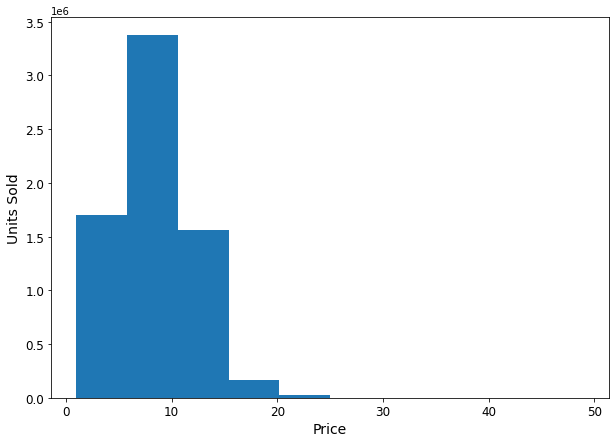

In [ ]:
# Grouping the number of units sold by price
df_price_units = df.groupby(['price'])['units_sold'].sum().reset_index(name ='units_sold_by_price')

# Setting the figure size
plt.figure(figsize = (10, 7))

# Plotting a histogram of price with weights as the units sold at each price
plt.hist(df_price_units['price'], weights = df_price_units['units_sold_by_price'])

# Setting various axis parameters
plt.tick_params(axis='x', which='major', labelsize=12)
    
plt.xlabel("Price", fontsize = 14)
    
plt.tick_params(axis='y', which='major', labelsize=12)
    
plt.ylabel("Units Sold", fontsize = 14)

plt.show()

From this histogram, we can see that the number of units first increses upto a particular price and then decreases as the goods get more expensive. This trend is somewhat sensbible in that people prefer more goods upto a price range that most of them can afford but after a certain point, as the prices rise further, sales decline.

# Hypothesis: Product Rating Is Proportional To The Units Sold
Plotting the average rating of products which received at least a 100 ratings vs the number of units sold for a fair enough comparison

[]

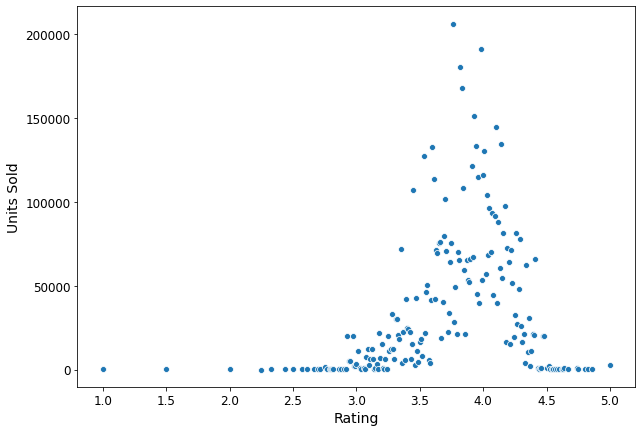

In [ ]:
# Removing all the records having null values in any product rating related column
df_rating = df.drop(df[(df['rating_count'].isnull()) | 
                       (df['rating_five_count'].isnull()) | 
                       (df['rating_four_count'].isnull()) | 
                       (df['rating_three_count'].isnull()) | 
                       (df['rating_two_count'].isnull()) | 
                       (df['rating_one_count'].isnull())].index)

# Further removing all products which received less than 100 ratings so that the ratings are not bloated by a few good ones
df_rating = df_rating.drop(df_rating[(df_rating['rating_count'] < 100)].index)

# Grouping the number of units sold by the average rating received by the product
df_rating_units = df.groupby(['rating'])['units_sold'].sum().reset_index(name ='units_sold_by_rating')

# Setting the figure size
plt.figure(figsize = (10, 7))

# Making a scatterplot of rating received vs the corresponding number of units sold 
sb.scatterplot(data = df_rating_units, x = 'rating', y = 'units_sold_by_rating')

# Setting various axis parameters
plt.tick_params(axis='x', which='major', labelsize=12)
    
plt.xlabel("Rating", fontsize = 14)
    
plt.tick_params(axis='y', which='major', labelsize=12)
    
plt.ylabel("Units Sold", fontsize = 14)

plt.plot()

In this case, an increasing trend was expected to be observed with more units being sold for higher rated products but instead a peak at about a rating of 4.0 is observed from the graph. This might appear counterintuitive at first, but it is most probably an issue with the dataset including very few products with average ratings above 4.5 thus explaining why the graph plummets after that value

# Hypothesis: Products Shipped To More Countries Have More Units Sold
Plotting number of countries shipped to vs the units sold to test this

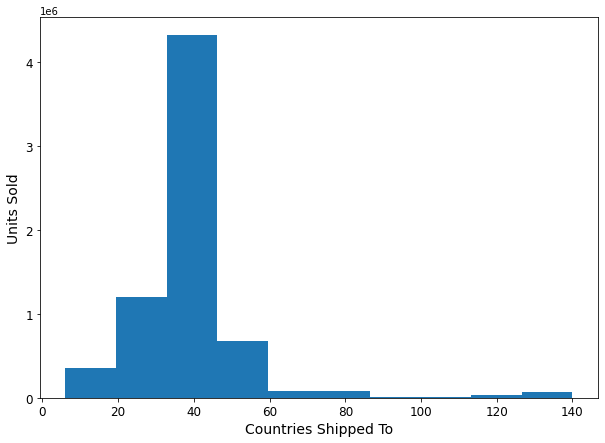

In [ ]:
# Grouping the number of units sold by the number of countries a product is shipped to
df_country_units = df.groupby(['countries_shipped_to'])['units_sold'].sum().reset_index(name ='units_sold_by_country')

# Setting the figure size
plt.figure(figsize = (10, 7))

# Plotting a histogram between the number pf countries shipped to with the units sold as weights
plt.hist(df_country_units['countries_shipped_to'], weights = df_country_units['units_sold_by_country'])

# Setting various axis parameters
plt.tick_params(axis='x', which='major', labelsize=12)
    
plt.xlabel("Countries Shipped To", fontsize = 14)
    
plt.tick_params(axis='y', which='major', labelsize=12)
    
plt.ylabel("Units Sold", fontsize = 14)

plt.show()

From this histogram, we can see that the number of units first increses upto about 40 countries and then decreases as the goods get shipped to more countries. This trend is somewhat hard to interpret. It could be that goods that focus on a select few countries do very well rather than spreading out the sales over a number of countries. But, at the same time, the dataset given could be under-representative of the goods which are being shipped to many countries which make it hard to draw a conclusion.

# Hypothesis: Using Ad Boosts Can Boost Sales
Plotting uses_ad_boosts vs the number of units sold to test this

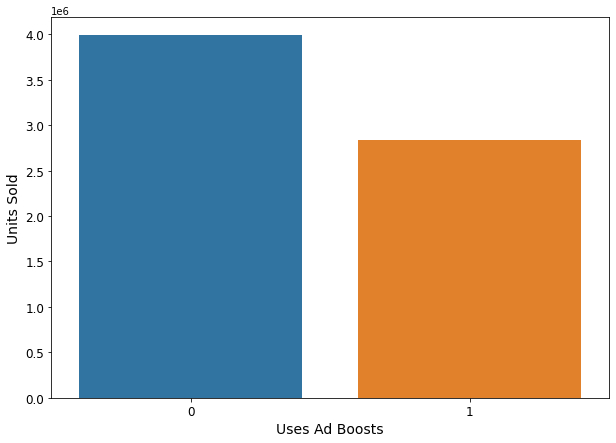

In [ ]:
# Grouping the number of units sold by the usage of ad boosts
df_boosts_units = df.groupby(['uses_ad_boosts'])['units_sold'].sum().reset_index(name ='units_sold_by_boosts')

# Setting the figure size
plt.figure(figsize = (10, 7))

# Plotting a bar plot between ad boosts and units sold
sb.barplot(x = df_boosts_units['uses_ad_boosts'], y = df_boosts_units['units_sold_by_boosts'])

# Setting various axis parameters
plt.tick_params(axis='x', which='major', labelsize=12)
    
plt.xlabel("Uses Ad Boosts", fontsize = 14)
    
plt.tick_params(axis='y', which='major', labelsize=12)
    
plt.ylabel("Units Sold", fontsize = 14)

plt.show()

The conclusion drawn from the graph is, again, counterintuitive as the number of units sold was expected to be more for products using ad boosts as it would help in the marketing of the product. It could again be attributed to an under-representative dataset.

# Question: Does Merchant Rating Affect Product Rating?
Plotting merchant_rating vs product rating (only for products having total ratings greater than 100) to check if they are correlated

[]

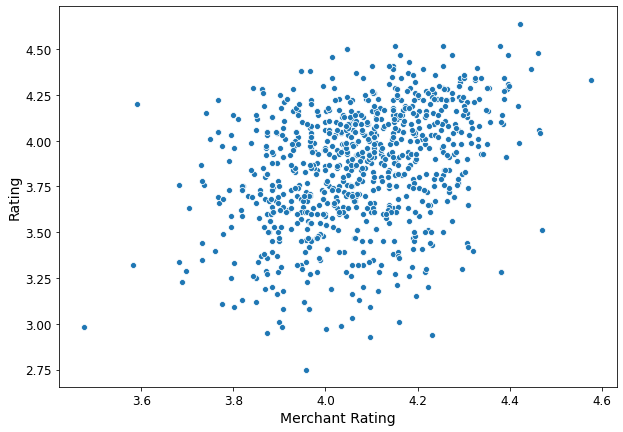

In [ ]:
# Removing all the records having null values in any product rating related column
df_rating = df.drop(df[(df['rating_count'].isnull()) | 
                       (df['rating_five_count'].isnull()) | 
                       (df['rating_four_count'].isnull()) | 
                       (df['rating_three_count'].isnull()) | 
                       (df['rating_two_count'].isnull()) | 
                       (df['rating_one_count'].isnull())].index)

# Further removing all products which received less than 100 ratings so that the ratings are not bloated by a few good ones
df_rating = df_rating.drop(df_rating[(df_rating['rating_count'] < 100)].index)

# Setting the figure size
plt.figure(figsize = (10, 7))

# Making a scatter plot between merchant rating and product rating for a comparison
sb.scatterplot(data = df_rating, x = 'merchant_rating', y = 'rating')

# Setting various axis parameters
plt.tick_params(axis='x', which='major', labelsize=12)
    
plt.xlabel("Merchant Rating", fontsize = 14)
    
plt.tick_params(axis='y', which='major', labelsize=12)
    
plt.ylabel("Rating", fontsize = 14)

plt.plot()

From the graph, we can see a roughly incrasing trend of product rating with merchant rating suggesting that the ratings awarded by the consumers for a particular product, depends to a certain extent on the rating of the merchant. A higher rated merchant would ensure a smooth experience for the consumer, thereby increasing his satisfaction and thus this trend makes sense.

# Question: Which Color Is The Most Popular?
Plotting the number of units sold by color to find the most popular color choice in the dataset

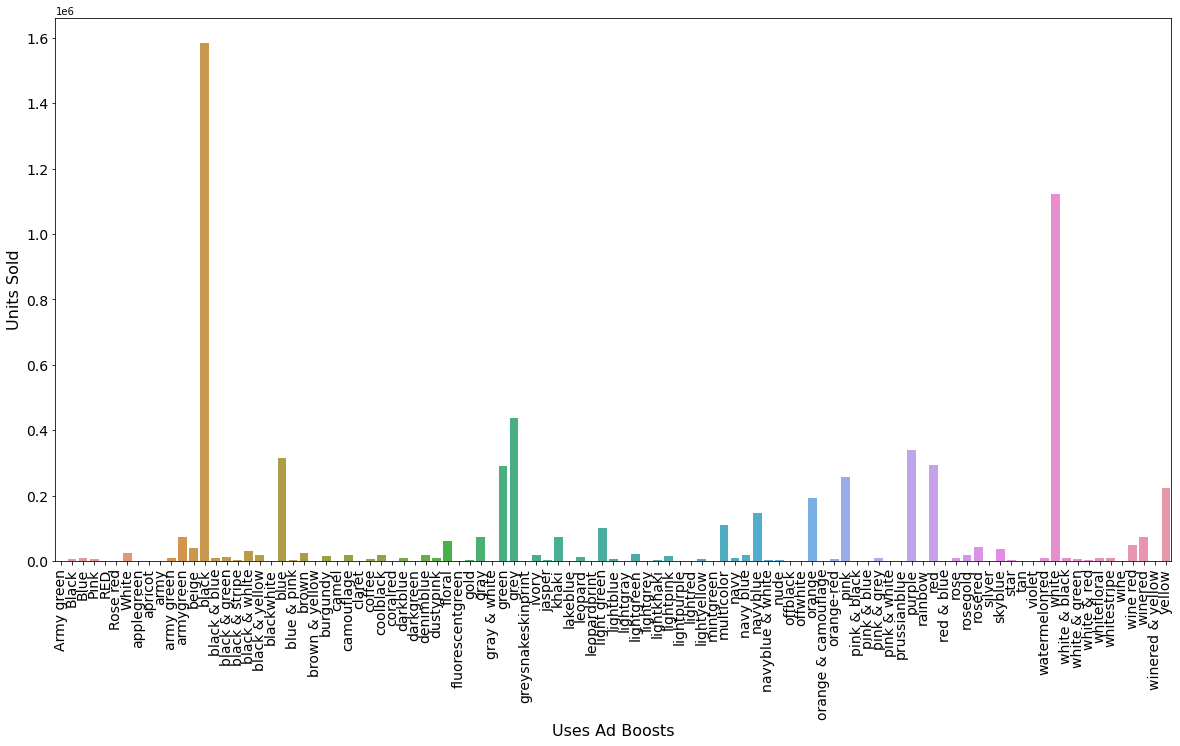

In [ ]:
# Removing the products with missing colors
df_color = df.drop(df[df['product_color'].isnull()].index)

# Grouping the number of units sold by the product colors 
df_color_units = df.groupby(['product_color'])['units_sold'].sum().reset_index(name ='units_sold_by_color')

# Setting the figure size
plt.figure(figsize = (20, 10))

# Plotting a bar plot between product color and units sold
sb.barplot(x = df_color_units['product_color'], y = df_color_units['units_sold_by_color'])

# Setting various axis parameters
plt.tick_params(axis='x', which='major', labelsize=14)
    
plt.xlabel("Uses Ad Boosts", fontsize = 16)

plt.xticks(rotation = 90)
    
plt.tick_params(axis='y', which='major', labelsize=14)
    
plt.ylabel("Units Sold", fontsize = 16)

plt.show()

From the bar plot, it is evident that black is the most popular color choice by a large margin.